## Setup

In [1]:
import csv
# from geopy.geocoders import Nominatim
import geocoder
import glob
import math
import matplotlib.pyplot as plt
import numpy as np
import os
import pickle
import time

%matplotlib inline

## load data from .csv files

In [2]:
loc_idx = 3
epiwk_idx = 7
amt_idx = 13

filenames = [f for f in glob.glob('*.csv')]
data = {}

dates = []

for f in filenames:
    with open(f) as csvfile:
        readcsv = csv.reader(csvfile, delimiter=',')
        country = " ".join(f.split()[:-1]).lower()

        # data[country] = {}
        for row_idx, row in enumerate(readcsv):
            loc = row[loc_idx]
            amt = row[amt_idx]
            if row_idx == 0 or not loc or not amt:
                continue
                
            loc = row[loc_idx].lower()
            data.setdefault((country,loc),{})
            
            epiwk = row[epiwk_idx].split()[-1][1:-1]
            epiwk = (int(epiwk[0:4]),int(epiwk[6:]))
            data[(country,loc)].setdefault('cases', {})
            data[(country,loc)]['cases'].setdefault(epiwk, 0)
            dates.append(epiwk)
            data[(country,loc)]['cases'][epiwk] += float(amt)
                
            #loc = row[loc_idx].lower()
            #data[country].setdefault(loc, {})
            
            #epiwk = row[epiwk_idx].split()[-1][1:-1]
            #epiwk = (int(epiwk[0:4]),int(epiwk[6:]))            
            #data[country][loc].setdefault(epiwk, 0)
            #dates.append(epiwk)
            
            #data[country][loc][epiwk] += float(amt)
            

add population data

In [3]:
data[('liberia','bomi')]['pop'] = 82036
data[('liberia','bong')]['pop'] = 328919
data[('liberia','gbarpolu')]['pop'] = 83758
data[('liberia','grand bassa')]['pop'] = 224839
data[('liberia','grand cape mount')]['pop'] = 129055
data[('liberia','grand gedeh')]['pop'] = 126146
data[('liberia','grand kru')]['pop'] = 57106
data[('liberia','lofa')]['pop'] = 270114
data[('liberia','margibi')]['pop'] = 199689
data[('liberia','maryland')]['pop'] = 136404
data[('liberia','montserrado')]['pop'] = 1144806
data[('liberia','nimba')]['pop'] = 468088
data[('liberia','rivercess')]['pop'] = 65862
data[('liberia','river gee')]['pop'] = 67318
data[('liberia','sinoe')]['pop'] = 104932

data[('sierra leone','kailahun')]['pop'] = 526379
data[('sierra leone','kenema')]['pop'] = 609891
data[('sierra leone','kono')]['pop'] = 506100
data[('sierra leone','bombali')]['pop'] = 606544
data[('sierra leone','koinadugu')]['pop'] = 409372
data[('sierra leone','tonkolili')]['pop'] = 531435
data[('sierra leone','kambia')]['pop'] = 345474
data[('sierra leone','port loko')]['pop'] = 615376
data[('sierra leone','bo')]['pop'] = 575478
data[('sierra leone','bonthe')]['pop'] = 200781
data[('sierra leone','moyamba')]['pop'] = 318588
data[('sierra leone','pujehun')]['pop'] = 346461
data[('sierra leone','western area rural')]['pop'] = 444270
data[('sierra leone','western area urban')]['pop'] = 1055964

# data[('guinea','beyla')]['pop'] = 17096
# data[('guinea','boffa')]['pop'] = 27074
# data[('guinea','boke')]['pop'] = 54898
# data[('guinea','conakry')]['pop'] = 1660973
# data[('guinea','coyah')]['pop'] = 49574
# data[('guinea','dabola')]['pop'] = 25366
# data[('guinea','dalaba')]['pop'] = 8549
# data[('guinea','dinguiraye')]['pop'] = 18082
# data[('guinea','dubreka')]['pop'] = 157017
# data[('guinea','faranah')]['pop'] = 60449
# data[('guinea','forecariah')]['pop'] = 20112
# data[('guinea','fria')]['pop'] = 55271
# data[('guinea','gaoual')]['pop'] = 5962
# data[('guinea','gueckedou')]['pop'] = 62372
# data[('guinea','kankan')]['pop'] = 190722
# data[('guinea','kerouane')]['pop'] = 23248
# data[('guinea','kindia')]['pop'] = 138695
# data[('guinea','kissidougou')]['pop'] = 99931
# data[('guinea','koubia')]['pop'] = 4325
# data[('guinea','koundara')]['pop'] = 19230
# data[('guinea','kouroussa')]['pop'] = 31262
# data[('guinea','labe')]['pop'] = 92654
# data[('guinea','lelouma')]['pop'] = 4597
# data[('guinea','lola')]['pop'] = 28041
# data[('guinea','macenta')]['pop'] = 58588
# data[('guinea','mali')]['pop'] = 5421
# data[('guinea','mamou')]['pop'] = 68139
# data[('guinea',"n'zerekore")]['pop'] = 195027
# data[('guinea','pita')]['pop'] = 21839
# data[('guinea','siguiri')]['pop'] = 127492
# data[('guinea','telimele')]['pop'] = 13314
# data[('guinea','tougue')]['pop'] = 3747
# data[('guinea','yomou')]['pop'] = 7472

data[('guinea','beyla')]['pop'] = 325482
data[('guinea','boffa')]['pop'] = 211063
data[('guinea','boke')]['pop'] = 449405
data[('guinea','conakry')]['pop'] = 1667864
data[('guinea','coyah')]['pop'] = 264164
data[('guinea','dabola')]['pop'] = 182951
data[('guinea','dalaba')]['pop'] = 136320
data[('guinea','dinguiraye')]['pop'] = 195662
data[('guinea','dubreka')]['pop'] = 328418
data[('guinea','faranah')]['pop'] = 280511
data[('guinea','forecariah')]['pop'] = 244649
data[('guinea','fria')]['pop'] = 96527
data[('guinea','gaoual')]['pop'] = 194245
data[('guinea','gueckedou')]['pop'] = 291823
data[('guinea','kankan')]['pop'] = 472112
data[('guinea','kerouane')]['pop'] = 211017
data[('guinea','kindia')]['pop'] = 438315
data[('guinea','kissidougou')]['pop'] = 283609
data[('guinea','koubia')]['pop'] = 101171
data[('guinea','koundara')]['pop'] = 130205
data[('guinea','kouroussa')]['pop'] = 268224
data[('guinea','labe')]['pop'] = 318633
data[('guinea','lelouma')]['pop'] = 162634
data[('guinea','lola')]['pop'] = 175213
data[('guinea','macenta')]['pop'] = 298282
data[('guinea','mali')]['pop'] = 290320
data[('guinea','mamou')]['pop'] = 318738
data[('guinea',"n'zerekore")]['pop'] = 396118
data[('guinea','pita')]['pop'] = 277059
data[('guinea','siguiri')]['pop'] = 695449
data[('guinea','telimele')]['pop'] = 283639
data[('guinea','tougue')]['pop'] = 122959
data[('guinea','yomou')]['pop'] = 176664

shift dates to week numbers

In [4]:
min_year, min_wk = min(dates)
for (country,loc) in data.keys():
    for epiwk in tuple(data[(country,loc)]['cases']):
        year, wk = epiwk
        wk_adj = (year-min_year)*52 + wk
        data[(country,loc)]['cases'][wk_adj] = data[(country,loc)]['cases'].pop(epiwk)

fill in missing data

In [5]:
max_year, max_wk = max(dates)
wk_adj = (max_year-min_year)*52 + max_wk
# for t in range(1,123):
#     for key in data.keys():
#         if t not in data[key]['cases'].keys():
#             if t == 1:
#                 data[key]['cases'][t] = 0
#             else:
#                 data[key]['cases'][t] = data[key]['cases'][t-1]
for key in data.keys():
    for t in range(1,123):
        data[key]['cases'].setdefault(t, 0)
        if t > 1:
            data[key]['cases'][t] += data[key]['cases'][t-1]

normalize case counts by city population

In [6]:
for c in ['liberia','sierra leone', 'guinea']:
    for (country,loc) in data.keys():
        if country == c:
            for wk in range(1,123):
                num_cases = data[(country,loc)]['cases'][wk]
                pop = data[(country,loc)]['pop']
                data[(country,loc)]['cases'][wk] = float(num_cases)/pop

determine x,y position of cities from latitude, longitude

In [7]:
origin_lon = 0
origin_lat = 0
for (country,loc) in data.keys():
    query = loc + ', ' + country
    #time.sleep(1)
    g = geocoder.arcgis(query)
    pos = g.latlng
    #print(g,pos)
    x = (pos[1]-origin_lon)*40000*math.cos((origin_lat+pos[0])*math.pi/360)/360
    y = (pos[0]-origin_lat)*40000/360
    #pos = geolocator.geocode(query)
    #x = (pos.longitude-origin_lon)*40000*math.cos((origin_lat+pos.latitude)*math.pi/360)/360
    #y = (pos.latitude-origin_lat)*40000/360
    #print(query,":",pos,pos.latitude,pos.longitude)
    
    data[(country,loc)]['pos'] = (x,y)

plot data for a city

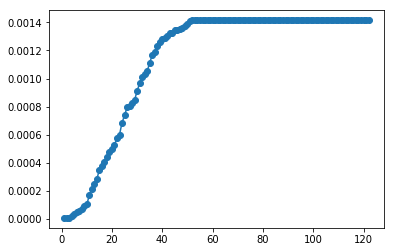

In [8]:
k = ('guinea','gueckedou')
# k = ('guinea','conakry')
cases = data[k]['cases']
x = [key for key in cases.keys()]
# y = [cases[key]*data[(plt_ctry,plt_loc)]['pop'] for key in cases.keys()]
y = [cases[key] for key in cases.keys()]

plt.plot(x, y, marker='o')

In [9]:
max_list = [(max(data[k]['cases'].values()),k) for k in data.keys()]
print(max(max_list))

(0.006297971953991942, ('sierra leone', 'western area rural'))


In [ ]:
# edges = {}
# max_dist = 200
# max_conn = 1
# for k in data.keys():
#     pos = np.asarray(data[k]['pos'])
#     dists = [(np.linalg.norm(pos - np.asarray(data[j]['pos'])),j) for j in data.keys() if j is not k]
#     dists = [d for d in dists if d[0] <= max_dist]
    
#     if len(dists) <= max_conn:
#         edges[k] = [d[1] for d in dists]
#     else:
#         edges[k] = [d[1] for d in sorted(dists)[0:max_conn]]

In [ ]:
# c = 'liberia'
# cnt = 0
# for c in ['liberia','sierra leone','guinea']:
#     print(c)
#     print('---')
#     for k in data.keys():
#         if c == k[0]:
#             print(k[1])
#             cnt += 1
#     print()
# print('total of %d cities' %cnt)

add edges to graph based on highways

In [10]:
edges = {}

# LIBERIA
edges[('liberia','bomi')] = [('liberia','grand cape mount'),('liberia','gbarpolu'),('liberia','montserrado')]
edges[('liberia','bong')] = [('liberia','nimba'),('liberia','grand bassa'),('liberia','margibi'),
                             ('liberia','montserrado'),('liberia','gbarpolu'),('liberia','lofa')]
edges[('liberia','gbarpolu')] = [('liberia','grand cape mount'),('liberia','bomi'),('liberia','bong'),
                                 ('liberia','lofa')]
edges[('liberia','grand bassa')] = [('liberia','margibi'),('liberia','bong'),('liberia','nimba'),
                                    ('liberia','rivercess')]
edges[('liberia','grand cape mount')] = [('liberia','bomi'),('liberia','gbarpolu')]
edges[('liberia','grand gedeh')] = [('liberia','river gee'),('liberia','sinoe'),('liberia','nimba')]
edges[('liberia','grand kru')] = [('liberia','sinoe'),('liberia','river gee'),('liberia','maryland')]
edges[('liberia','lofa')] = [('liberia','gbarpolu'),('liberia','bong')]
edges[('liberia','margibi')] = [('liberia','montserrado'),('liberia','bong'),('liberia','grand bassa')]
edges[('liberia','maryland')] = [('liberia','river gee'),('liberia','grand kru')]
edges[('liberia','montserrado')] = [('liberia','bomi'),('liberia','bong'),('liberia','margibi')]
edges[('liberia','nimba')] = [('liberia','grand gedeh'),('liberia','sinoe'),('liberia','rivercess'),
                              ('liberia','grand bassa'),('liberia','bong')]
edges[('liberia','rivercess')] = [('liberia','grand bassa'),('liberia','nimba'),('liberia','sinoe')]
edges[('liberia','river gee')] = [('liberia','maryland'),('liberia','grand kru'),('liberia','sinoe'),
                                  ('liberia','grand gedeh')]
edges[('liberia','sinoe')] = [('liberia','rivercess'),('liberia','nimba'),('liberia','grand gedeh'),
                              ('liberia','river gee'),('liberia','grand kru')]

# SIERRA LEONE
edges[('sierra leone','kenema')] = [('sierra leone','pujehun'),('sierra leone','bo'),('sierra leone','tonkolili'),
                                    ('sierra leone','kono'),('sierra leone','kailahun')]
edges[('sierra leone','moyamba')] = [('sierra leone','bonthe'),('sierra leone','bo'),('sierra leone','tonkolili'),
                                     ('sierra leone','port loko'),('sierra leone','western area rural')]
edges[('sierra leone','bonthe')] = [('sierra leone','pujehun'),('sierra leone','bo'),('sierra leone','moyamba')]
edges[('sierra leone','tonkolili')] = [('sierra leone','moyamba'),('sierra leone','bo'),('sierra leone','kenema'),
                                       ('sierra leone','kono'),('sierra leone','koinadugu'),
                                       ('sierra leone','bombali'),('sierra leone','port loko')]
edges[('sierra leone','port loko')] = [('sierra leone','kambia'),('sierra leone','bombali'),
                                       ('sierra leone','tonkolili'),('sierra leone','moyamba'),
                                       ('sierra leone','western area rural')]
edges[('sierra leone','western area rural')] = [('sierra leone','western area urban'),('sierra leone','port loko'),
                                                ('sierra leone','moyamba')]
edges[('sierra leone','kailahun')] = [('sierra leone','kono'),('sierra leone','kenema')]
edges[('sierra leone','bo')] = [('sierra leone','moyamba'),('sierra leone','bonthe'),('sierra leone','pujehun'),
                                ('sierra leone','kenema'),('sierra leone','tonkolili')]
edges[('sierra leone','western area urban')] = [('sierra leone','western area rural')]
edges[('sierra leone','bombali')] = [('sierra leone','kambia'),('sierra leone','port loko'),
                                     ('sierra leone','tonkolili'),('sierra leone','koinadugu')]
edges[('sierra leone','pujehun')] = [('sierra leone','bonthe'),('sierra leone','bo'),('sierra leone','kenema')]
edges[('sierra leone','koinadugu')] = [('sierra leone','bombali'),('sierra leone','tonkolili'),
                                       ('sierra leone','kono')]
edges[('sierra leone','kambia')] = [('sierra leone','port loko'),('sierra leone','bombali')]
edges[('sierra leone','kono')] = [('sierra leone','kenema'),('sierra leone','kailahun'),
                                  ('sierra leone','koinadugu'),('sierra leone','tonkolili')]

# GUINEA
edges[('guinea','beyla')] = [('guinea','kerouane'),('guinea',"n'zerekore")]
edges[('guinea','boffa')] = [('guinea','dubreka'),('guinea','boke'),('guinea','fria')]
edges[('guinea','boke')] = [('guinea','boffa'),('guinea','gaoual'),('guinea','telimele')]
edges[('guinea','conakry')] = [('guinea','dubreka'),('guinea','coyah')]
edges[('guinea','coyah')] = [('guinea','conakry'),('guinea','dubreka'),('guinea','kindia'),('guinea','forecariah')]
edges[('guinea','dabola')] = [('guinea','mamou'),('guinea','dinguiraye'),('guinea','faranah'),
                              ('guinea','kouroussa'),('guinea','tougue')]
edges[('guinea','dalaba')] = [('guinea','mamou'),('guinea','pita'),('guinea', 'tougue')]
edges[('guinea','dinguiraye')] = [('guinea','tougue'),('guinea','siguiri'),('guinea','dabola')]
edges[('guinea','dubreka')] = [('guinea','conakry'),('guinea','boffa'),('guinea','coyah'),('guinea','fria')]
edges[('guinea','faranah')] = [('guinea','mamou'),('guinea','kissidougou'),('guinea','kouroussa'),
                               ('guinea','dabola')]
edges[('guinea','forecariah')] = [('guinea','coyah')]
edges[('guinea','fria')] = [('guinea','dubreka'),('guinea','telimele'),('guinea','boffa')]
edges[('guinea','gaoual')] = [('guinea','boke'),('guinea','koundara'),('guinea', 'telimele')]
edges[('guinea','gueckedou')] = [('guinea','kissidougou'),('guinea','macenta')]
edges[('guinea','kankan')] = [('guinea','kissidougou'),('guinea','kouroussa'),('guinea','siguiri'),
                              ('guinea','kerouane')]
edges[('guinea','kerouane')] = [('guinea','kankan'),('guinea','beyla'),('guinea','macenta'),
                                ('guinea','kissidougou')]
edges[('guinea','kindia')] = [('guinea','mamou'),('guinea','coyah')]
edges[('guinea','kissidougou')] = [('guinea','gueckedou'),('guinea','kankan'),('guinea','faranah'),
                                   ('guinea','kerouane')]
edges[('guinea','koubia')] = [('guinea','labe'),('guinea','tougue')]
edges[('guinea','koundara')] = [('guinea','gaoual'),('guinea','labe'),('guinea','mali')]
edges[('guinea','kouroussa')] = [('guinea','kankan'),('guinea','faranah'),('guinea','dabola')]
edges[('guinea','labe')] = [('guinea','pita'),('guinea','koubia'),('guinea','tougue'),('guinea','koundara'),
                            ('guinea','mali'),('guinea','lelouma')]
edges[('guinea','lelouma')] = [('guinea','labe')]
edges[('guinea','lola')] = [('guinea',"n'zerekore")]
edges[('guinea','macenta')] = [('guinea',"n'zerekore"),('guinea','gueckedou'),('guinea','kerouane')]
edges[('guinea','mali')] = [('guinea','labe'),('guinea','koundara')]
edges[('guinea','mamou')] = [('guinea','kindia'),('guinea','pita'),('guinea','dabola'),('guinea','dalaba'),
                             ('guinea','faranah')]
edges[('guinea',"n'zerekore")] = [('guinea','yomou'),('guinea','lola'),('guinea','macenta'),('guinea','beyla')]
edges[('guinea','pita')] = [('guinea','labe'),('guinea','mamou'),('guinea','telimele'),('guinea','dalaba')]
edges[('guinea','siguiri')] = [('guinea','kankan'),('guinea','dinguiraye')]
edges[('guinea','telimele')] = [('guinea','fria'),('guinea','pita'),('guinea','boke'),('guinea','gaoual')]
edges[('guinea','tougue')] = [('guinea','koubia'),('guinea','labe'),('guinea','dinguiraye'),('guinea','dalaba'),
                              ('guinea','dabola')]
edges[('guinea','yomou')] = [('guinea',"n'zerekore")]

# INTER-COUNTRY
edges[('sierra leone','kambia')].append(('guinea','forecariah'))
edges[('guinea','forecariah')].append(('sierra leone','kambia'))
edges[('sierra leone','koinadugu')].append(('guinea','faranah'))
edges[('guinea','faranah')].append(('sierra leone','koinadugu'))
edges[('sierra leone','kailahun')].extend([('liberia','lofa'),('guinea','gueckedou')])
edges[('liberia','lofa')].append(('sierra leone','kailahun'))
edges[('guinea','gueckedou')].append(('sierra leone','kailahun'))
edges[('liberia','lofa')].append(('guinea','macenta'))
edges[('guinea','macenta')].append(('liberia','lofa'))
edges[('sierra leone','kono')].append(('guinea','gueckedou'))
edges[('guinea','gueckedou')].append(('sierra leone','kono'))
edges[('sierra leone','pujehun')].append(('liberia','grand cape mount'))
edges[('liberia','grand cape mount')].append(('sierra leone','pujehun'))


current_keys = tuple(edges.keys())
for node in current_keys:
    for other_node in edges[node]:
        #edges.setdefault(other_node,[])
        if other_node not in current_keys:
            continue
        if node not in edges[other_node]:
            edges[other_node].append(node)
            print('warning: had to add',node,'to',other_node)

(7, ('sierra leone', 'tonkolili'))
(1, ('guinea', 'lelouma'))


{'boxes': [<matplotlib.lines.Line2D at 0x7f3889f36438>],
 'caps': [<matplotlib.lines.Line2D at 0x7f3889f1fd30>,
 'fliers': [<matplotlib.lines.Line2D at 0x7f3889f1d748>],
 'means': [],
 'medians': [<matplotlib.lines.Line2D at 0x7f3889f43860>],
 'whiskers': [<matplotlib.lines.Line2D at 0x7f38806ec748>,
  <matplotlib.lines.Line2D at 0x7f3889f36f98>]}

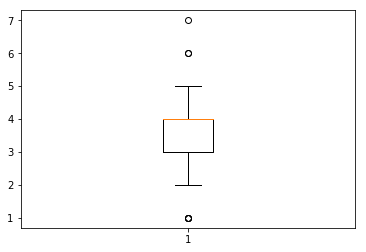

In [151]:
degrees = [(len(edges[k]),k) for k in edges.keys()]
degrees_values = [t[0] for t in degrees]
print(max(degrees))
print(min(degrees))
plt.boxplot(degrees_values)

plot graph model

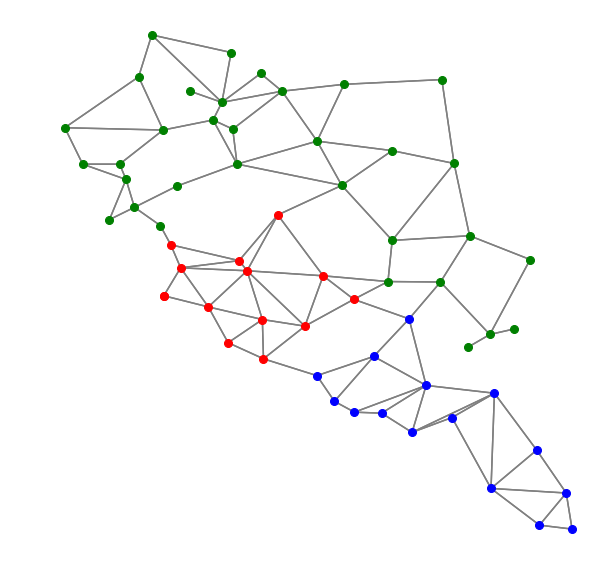

In [12]:
# img = plt.imread('west_africa.png')

plt.figure(figsize=(10,10))
plt.axis('off')

for (country,loc) in data.keys():
    pos = data[(country,loc)]['pos']
    
    if country == 'sierra leone':
        mrkr = 'o'
        mrkr_col = 'r'
    elif country == 'guinea':
        mrkr = 'o'
        mrkr_col = 'g'
    elif country == 'liberia':
        mrkr = 'o' 
        mrkr_col = 'b'
        
    plt.plot(pos[0], pos[1], marker=mrkr, color=mrkr_col, markersize=8)
    
    if (country,loc) in edges.keys():
        for el in edges[(country,loc)]:
            other_pos = data[el]['pos']
            plt.plot([pos[0],other_pos[0]], [pos[1],other_pos[1]], zorder=0, color='gray')
        
    #plt.text(pos[0],pos[1],loc)

# plt.imshow(img, zorder=-1, extent=)
# plt.savefig('west_africa_graph_edges.png', dpi=300, bbox_inches='tight', transparent=True)

create animation of spatial data

In [43]:
folder = '/tmp3/'

scalex = 1
scaley = 1
x_orig = 0
y_orig = 0
ub = 123

for wk in range(1,ub):
    
    plt.figure(figsize=(10,10))
    plt.axis('off')
    
    for k in data.keys():
        ctry,loc = k 
        
        if ctry  == 'sierra leone':
            mrkr_col = 'r'
        elif ctry == 'guinea':
            mrkr_col = 'g'
        elif ctry == 'liberia':
            mrkr_col = 'b'
            
        pos = data[k]['pos']
        if wk > 1:
            mrkr_size = 20000*(data[k]['cases'][wk]-data[k]['cases'][wk-1]) + 4
        else:
            mrkr_size = 4
            
        plt.plot(pos[0], pos[1], marker='o', color=mrkr_col, markersize=mrkr_size)
        
        for el in edges[k]:
            other_pos = data[el]['pos']
            plt.plot([pos[0],other_pos[0]], [pos[1],other_pos[1]], zorder=0, color='gray', linewidth=1)
       
    fn = os.getcwd() + folder + 'img%s' %str(wk).zfill(3)
    plt.savefig(fn,dpi=300,bbox_inches='tight')
    plt.close()

In [44]:
# k = ('liberia','montserrado')
# for wk in range(2,ub):
#     val = 20000*(data[k]['cases'][wk]-data[k]['cases'][wk-1]) + 4
#     print("%0.7f, %0.7f" %(data[k]['cases'][wk],val))

fit spreading parameters to data

In [14]:
# ctry = 'guinea'
# city = 'conakry'
# k = (ctry,city)

# wk_range = 50
# ml = []

for k in data.keys():
    
    tc = [(data[k]['cases'][wk],wk) for wk in range(1,123)]
    max_val = max(tc)[0]
    lower = [e for e in tc if e[0] < 0.6*max_val]
    if lower:
        wk_range = max(lower)[1]
    else:
        wk_range = 122
        
    #wk_range = max(tc)[1]
    #wk_range = 38
    
    A = -1*np.ones((wk_range-1,2))
    b = -1*np.ones(wk_range-1)
    for t in range(1,wk_range):
        A[t-1,0] = data[k]['cases'][t]
        A[t-1,1] = 0
        #for el in edges[k]:
        #    A[t-1,1] += data[el]['cases'][t]
        A[t-1,1] /= len(edges[k])
        #A[t-1,2] = 1

    for t in range(2,wk_range+1):
        b[t-2] = data[k]['cases'][t] #- data[k]['cases'][t-1]
        
    #ml.append(np.amax(A[:,1]))
    
    #A = -1*np.ones(wk_range-1)
    #b = -1*np.ones(wk_range-1)
    #for t in range(1,wk_range):
    #    A[t-1] = data[k]['cases'][t]
    #    for el in edges[k]:
    #        A[t-1] += data[el]['cases'][t]
    #for t in range(2,wk_range+1):
    #    b[t-2] = data[k]['cases'][t] - data[k]['cases'][t-1]

    x = np.linalg.lstsq(A,b)[0]
    #print("%+0.7f, %+0.7f, %+0.7f, %03d, %s" %(x[0],x[1],x[2],wk_range,k))
    print("%+0.7f, %+0.7f, %03d, %s" %(x[0],x[1],wk_range,k))    

    #x = np.mean(np.divide(A,b))
    #print("%+0.7f, %03d, %s" %(x,wk_range,k))    

    data[k]['params'] = x

+1.0456389, +0.0000000, 047, ('guinea', 'dabola')
+1.1020526, +0.0000000, 056, ('sierra leone', 'kambia')
+1.1669870, +0.0000000, 047, ('sierra leone', 'western area rural')
+1.7001570, +0.0000000, 046, ('guinea', 'faranah')
+1.1545834, +0.0000000, 050, ('sierra leone', 'western area urban')
+1.2720856, +0.0000000, 037, ('liberia', 'nimba')
+1.0879388, +0.0000000, 057, ('guinea', 'dubreka')
+1.2155172, +0.0000000, 047, ('guinea', 'siguiri')
+1.1657487, +0.0000000, 037, ('liberia', 'bomi')
+0.0000000, +0.0000000, 122, ('guinea', 'koundara')
+1.7500000, +0.0000000, 033, ('guinea', 'pita')
+1.0000000, +0.0000000, 039, ('liberia', 'grand gedeh')
+1.2048518, +0.0000000, 043, ('liberia', 'sinoe')
+1.4218674, +0.0000000, 039, ('sierra leone', 'pujehun')
+1.0500000, +0.0000000, 045, ('sierra leone', 'bonthe')
+1.1703657, +0.0000000, 051, ('sierra leone', 'kono')
+1.2892112, +0.0000000, 044, ('guinea', 'kerouane')
+1.0662461, +0.0000000, 044, ('liberia', 'rivercess')
+0.0000000, +0.0000000, 012

number of neighbors: 3


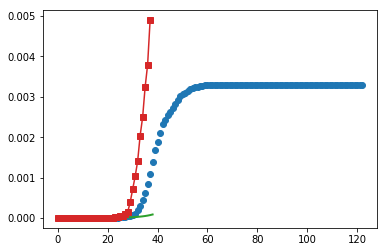

In [58]:
ctry = 'liberia'
city = 'montserrado'
k = (ctry,city)
cases = data[k]['cases']

time = [key for key in cases.keys()]
# y = [cases[key]*data[(plt_ctry,plt_loc)]['pop'] for key in cases.keys()]
count = [cases[key] for key in cases.keys()]

plt.plot(time, count, marker='o', linestyle='None')

predict_count = []
ni_list = []
predict_count.append(5e-8)
tc = [(data[k]['cases'][wk],wk) for wk in range(1,123)]
max_val = max(tc)[0]
lower = [e for e in tc if e[0] < 0.51*max_val]
if lower:
    wk_ub = max(lower)[1]
else:
    wk_ub = 122
# wk_ub = 40

for t in range(1,wk_ub):
    p = data[k]['params']
    
    ni = 0
    for el in edges[k]:
        ni += data[el]['cases'][t]
        
    #val = data[k]['cases'][t]*p[0] + ni*p[1] #+ p[2]
    #val = predict_count[t-1]*(1-p[0]) + ni*p[1]
    val = predict_count[t-1]*p[0]# + ni*p[1]
    predict_count.append(val)
    ni_list.append(ni)
    #print(ni)

print('number of neighbors: %d' %len(edges[k]))
plt.plot(range(0,wk_ub), predict_count, linewidth=2, color='C2')
plt.plot(range(0,wk_ub-1), ni_list, marker='s', color='C3')

median: 1.169, mean: 1.105


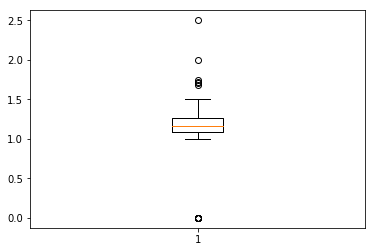

In [17]:
p1 = [data[k]['params'][0] for k in data.keys()]
p2 = [data[k]['params'][1] for k in data.keys()]
# p3 = [data[k]['params'][2] for k in data.keys()]

# plt.subplot(1,2,1)
plt.boxplot(p1)
# plt.subplot(1,2,2)
# plt.boxplot(p2)
print("median: %0.3f, mean: %0.3f" %(np.median(p1),np.mean(p1)))
# print("median: %0.3f, mean: %0.3f" %(np.median(p2),np.mean(p2)))

min: 1.00
median: 36.00
max: 112.00


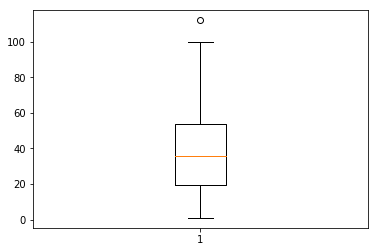

In [149]:
dt = []
for k in data.keys():
    pairs = [(data[k]['cases'][wk],wk) for wk in data[k]['cases'].keys()]
    values = list(data[k]['cases'].values())
    low, high = values[0], values[-1]
    
    if low == high:
        continue
    
    low_set = [c for c in pairs if c[0] <= low]
    high_set = [c for c in pairs if c[0] >= high]
    
    if not low_set and not high_set:
        continue
    
    low_wk = max(low_set)[1]
    high_wk = min(high_set)[1]
    
    dt.append(high_wk - low_wk)


plt.boxplot(dt)
print('min: %0.2f' %np.amin(dt))
print('median: %0.2f' %np.median(dt))
print('max: %0.2f' %np.amax(dt))

In [80]:
graph = {}
for k in data.keys():
    graph[k] = {}
    graph[k]['pos'] = data[k]['pos']
    graph[k]['edges'] = edges[k]

In [83]:
pickle.dump(graph, open('ebola_graph.pkl', 'wb'))

## old code

In [ ]:
min_year, min_wk = min(dates)
for country in data.keys():
    for loc in data[country].keys():
        for epiwk in tuple(data[country][loc].keys()):
            year, wk = epiwk
            wk_adj = (year-min_year)*52 + wk
            data[country][loc][wk_adj] = data[country][loc].pop(epiwk)
            
# for date in tuple(cases.keys()):
#     year, wk = date
#     wk_adj = (year-min_year)*52 + wk
#     cases[wk_adj] = cases.pop(date)

In [ ]:
max_year, max_wk = max(dates)
wk_adj = (max_year-min_year)*52 + max_wk
for t in range(1,123):
    for country in data.keys():
        for loc in data[country].keys():
            if t not in data[country][loc].keys():
                if t == 1:
                    data[country][loc][t] = 0
                else:
                    data[country][loc][t] = data[country][loc][t-1]

In [ ]:
num_cases = {}

for country in data.keys():
    for loc in data[country].keys():
        for key in data[country][loc].keys():
            if key == 'pos':
                continue
            
            num_cases.setdefault(key, 0)
            num_cases[key] += data[country][loc][key]
            
total_cases = sum(num_cases.values())

In [ ]:
origin_lon = 0
origin_lat = 0
geolocator = Nominatim()
for country in data.keys():
    for loc in data[country].keys():
        query = loc + ', ' + country
        pos = geolocator.geocode(query)
        x = (pos.longitude-origin_lon)*40000*math.cos((origin_lat+pos.latitude)*math.pi/360)/360
        y = (pos.latitude-origin_lat)*40000/360
        
        data[country][loc]['pos'] = (x,y)
        

In [ ]:
edges = {}
for country in data.keys():
    for loc in data[country].keys():
        pos = data[country][loc]['pos']
        dists = [np.linalg.norm(np.asarray(pos) - np.asarray(other)) for ]

In [ ]:
# pickle.dump(data, open('ebola_data.pkl', 'wb'))

In [ ]:
for country in data.keys():
    print(country)
    print(data[country].keys())
    print()

In [ ]:
plt_ctry = 'sierra leone'
plt_loc = 'western area urban'
sub_data = data[plt_ctry][plt_loc]
x = [key for key in sub_data.keys() if key != 'pos']
y = [sub_data[key] for key in sub_data.keys() if key != 'pos']

plt.plot(x,y,marker='o')


In [ ]:
scalex = 1
scaley = 1
scalec = 60
#x_orig = -1600
#y_orig = 500
x_orig = 0
y_orig = 0
ub = 123

for wk in range(1,ub):
    
    plt.figure(figsize=(10,10))
    plt.axis('off')

    for country in data.keys(): 
        xpt = []
        ypt = []
        color = []
        
        if country == 'sierra leone':
            mrkr = 'o'
        elif country == 'guinea':
            mrkr = '^'
        elif country == 'liberia':
            mrkr = 'x'            
    
        for loc in data[country].keys():
            if wk in data[country][loc].keys():
                x,y = data[country][loc]['pos']
                val = data[country][loc][wk]
                plot_val = scalec*float(val)/max([1,float(total_cases)])
                xpt.append(scalex*(x - x_orig))
                ypt.append(scaley*(y - y_orig))
                color.append(plot_val)
                
        plt.scatter(xpt, ypt, c=color, cmap='gnuplot', marker=mrkr, vmin=0, vmax=1)
        
    fn = os.getcwd() + '/tmp/' + 'img%s' %str(wk).zfill(3)
    plt.savefig(fn,dpi=300,bbox_inches='tight')
    plt.close()
    

In [ ]:
for t in range(10):
    wk = ub-1
    plt.figure(figsize=(10,10))
    plt.axis('off')

    for country in data.keys(): 
        xpt = []
        ypt = []
        color = []
        
        if country == 'sierra leone':
            mrkr = 'o'
        elif country == 'guinea':
            mrkr = '^'
        elif country == 'liberia':
            mrkr = 'x'            
    
        for loc in data[country].keys():
            if wk in data[country][loc].keys():
                x,y = data[country][loc]['pos']
                val = data[country][loc][wk]
                plot_val = scalec*float(val)/max([1,float(total_cases)])
                xpt.append(scalex*(x - x_orig))
                ypt.append(scaley*(y - y_orig))
                color.append(plot_val)
                
        plt.scatter(xpt, ypt, c=color, cmap='gnuplot', marker=mrkr, vmin=0, vmax=1)
        
    fn = os.getcwd() + '/tmp/' + 'img%s' %str(wk+t+1).zfill(3)
    plt.savefig(fn,dpi=300,bbox_inches='tight')
    plt.close()